In [116]:
%matplotlib inline
%qtconsole

import os
import cPickle
import numpy as np
import pandas as pd
from scipy import linalg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset, date2num, num2date
from datetime import datetime, timedelta
from scipy import stats
import numpy as np
import os.path
import string

import t_subsample
from getSkillGridded_nosub import getSkillGridded
from load_gridded_data import read_gridded_data_CMIP5_model
from gridAvg import gridAvg



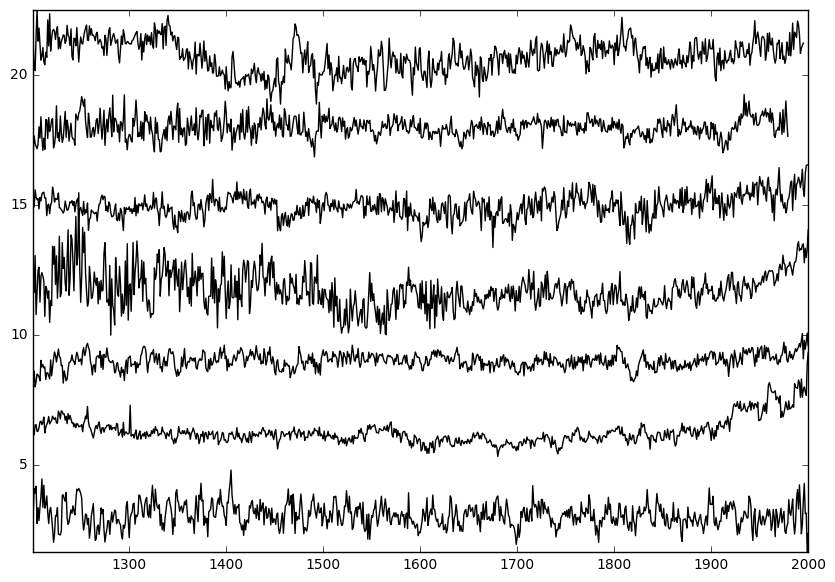

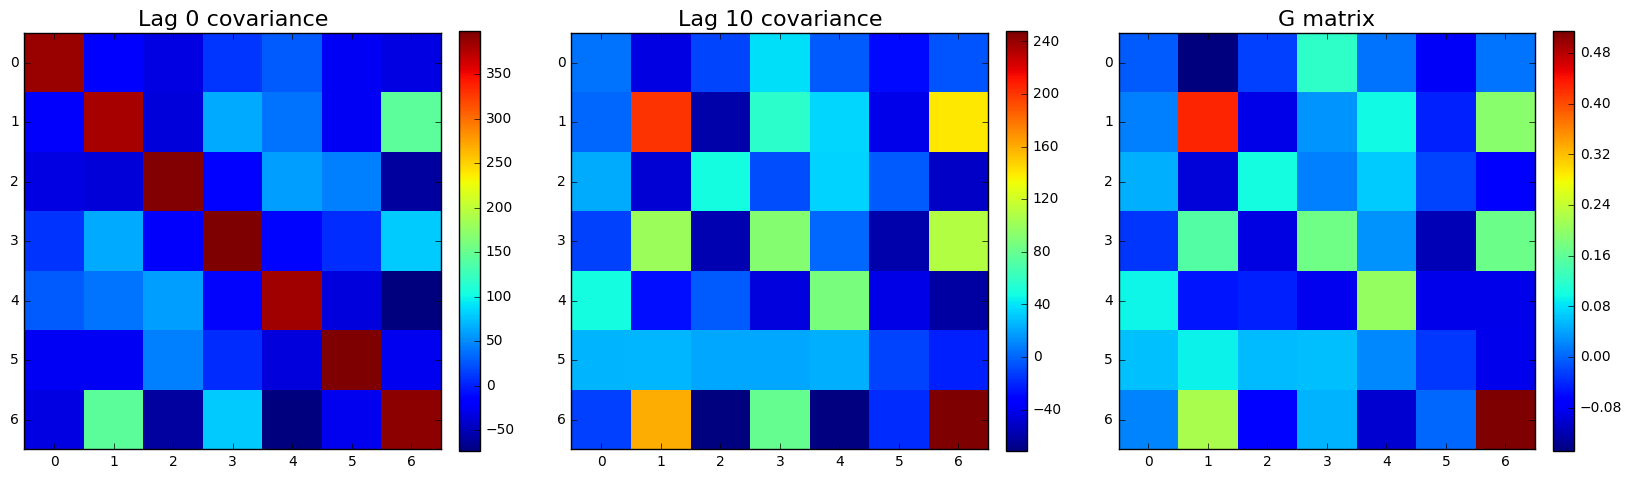

ValueError: too many values to unpack

In [212]:
filename = 'DatabaseS2-Regional-Temperature-Reconstructions.xlsx'
sheet = 'Composite - annual'
tmp = pd.read_excel(filename, sheet)

tmp = tmp.drop('N America pollen (SD)',1)
tmp.index = tmp['Mid-point CE']
tmp = tmp.drop('Mid-point CE',1)

# 1200:1600, 1600:1900 shows some skill
# Skill in the Arctic is generally higher.. why? Greater lag1 autocovariance?

# Plot the records selected 
plt.figure(figsize=(10,7))
lpn,mpn=tmp.shape
# spacing between time series
spc = 3;
pns = tmp+np.outer(np.ones(lpn)*spc,np.arange(1,mpn+1));
plt.plot(pns.iloc[1200:,:7],color='k');
plt.autoscale(enable=True, axis='both', tight=True)

corrdf,rmsedf,G,c0,ct = getSkillGridded(tmp,10,[1200,1600],[1200,1600],False,6);
print(corrdf)
print(rmsedf)



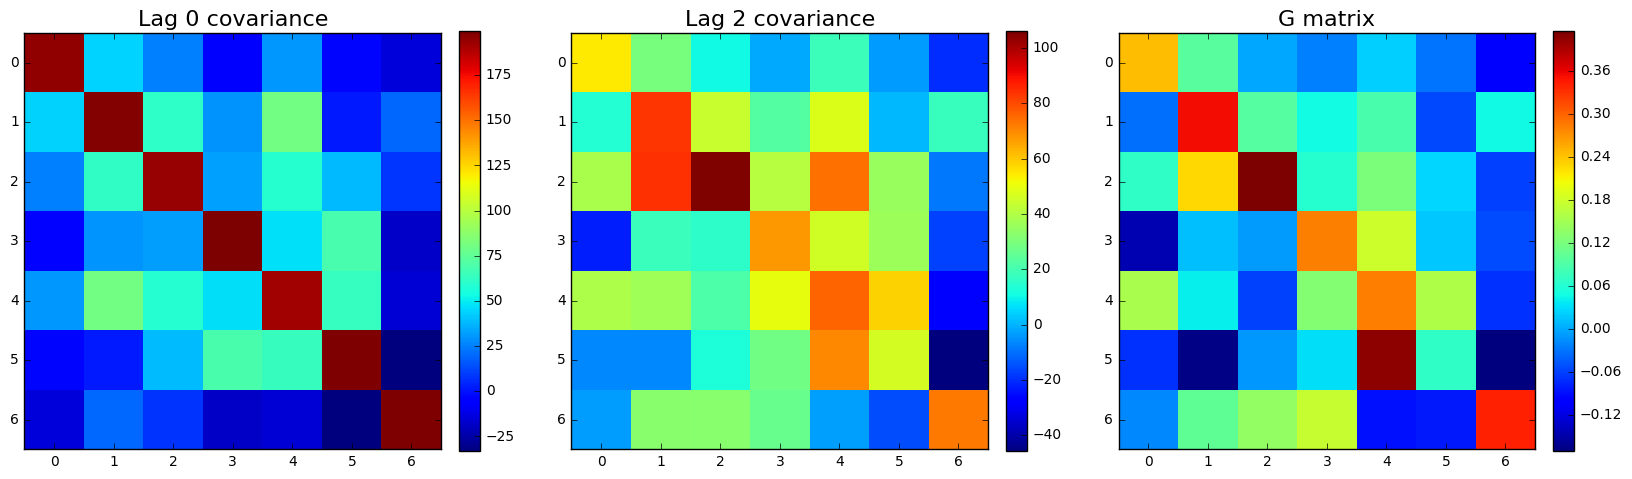

> /Users/dan/Dropbox (MIT)/2016-2017/LMR/getSkillGridded_nosub.py(174)getSkillGridded()
-> preddf = pandas.DataFrame(data = pred,index=np.arange(tau+valInt[0],tau+valInt[1]))
(Pdb) c
          0         1         2         3         4         5         6
1  0.067956  0.287711  0.022331 -0.235224 -0.083031  0.078952 -0.212451
          0         1         2         3         4         5         6
1  0.998364  0.962742  1.107957  1.150962  1.024324  1.031936  1.052786


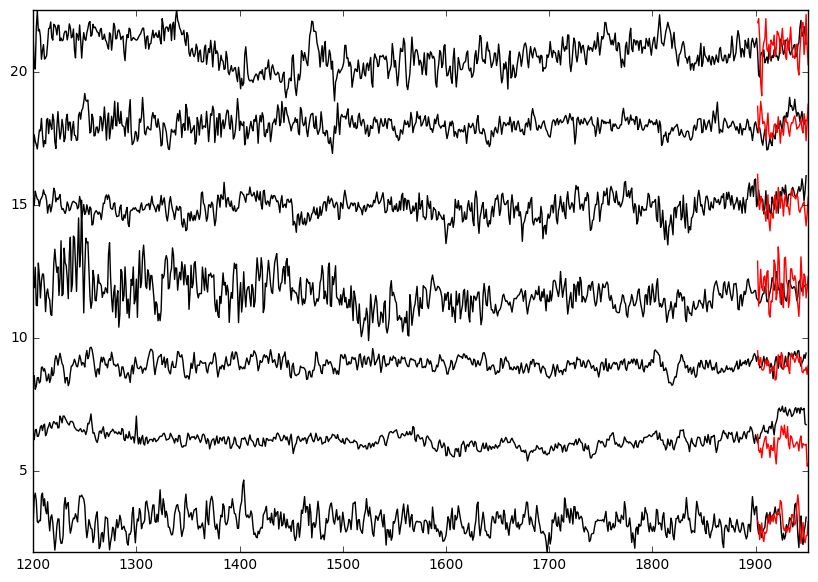

In [228]:
# Filter data in time
import getSkillGridded_nosub; reload(getSkillGridded_nosub); from getSkillGridded_nosub import getSkillGridded

import matplotlib.pyplot as plt
 
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = .8 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
tempf = signal.filtfilt(B,A, tmp[1200:1950].values,0)

tempfdf = pd.DataFrame(data=tempf,index=np.arange(1200,1950))

# 1 year prediction looks good at poles

corrdf,rmsedf,G,c0,ct,preddf = getSkillGridded(tempfdf,2,[1700,1900],[1900,1950],False,7,True);
#corrdf,rmsedf,G,c0,ct,preddf = getSkillGridded(tempfdf,10,[1200,1500],[1500,1800],False,6,True);
#corrdf,rmsedf,G,c0,ct,preddf = getSkillGridded(tempfdf,10,[1200,1800],[1800,1900],False,6);
print(corrdf)
print(rmsedf)


# Plot the records selected 
plt.figure(figsize=(10,7))
lpn,mpn=tempfdf.shape
# spacing between time series
spc = 3;
pns = tempfdf+np.outer(np.ones(lpn)*spc,np.arange(1,mpn+1));
plt.plot(pns.iloc[:,:7],color='k');

lpn,mpn=preddf.shape
# spacing between time series
spc = 3;
# Scale by stds of data
pns = preddf.mul(tempfdf.std(),1)+np.outer(np.ones(lpn)*spc,np.arange(1,mpn+1));
plt.plot(pns.iloc[:,:7],color='r');
plt.autoscale(enable=True, axis='both', tight=True)

plt.show()


In [ ]:
# Fit AR(1)
